# Modelo

Se obtienen los datos escalados de los datatsets que se guardaron en el paso anterior, esto con el fin de tener un facil acceso a ellos.

In [3]:
import pandas as pd

train_data = pd.read_csv("../data/processed/data_train.csv")
test_data = pd.read_csv("../data/processed/data_test.csv")

train_data.head()

ModuleNotFoundError: No module named 'pandas'

In [ ]:
train_data["most_severe_injury"].value_counts()


most_severe_injury
0    123958
1     25143
3     12822
2      5226
4       295
Name: count, dtype: int64

In [ ]:
test_data["most_severe_injury"].value_counts()

most_severe_injury
0    30831
1     6384
3     3253
2     1338
4       56
Name: count, dtype: int64

In [ ]:
#Se eliminó lighting_condition y trafficway_type porque segun el heatmap ambos tenían un 0 en correlación con la variable objetivo
#X_train = train_data.drop(columns=["most_severe_injury","lighting_condition","trafficway_type"], axis = 1)
#y_train = train_data["most_severe_injury"]
#X_test = test_data.drop(columns=["most_severe_injury","lighting_condition","trafficway_type"], axis = 1)
#y_test = test_data["most_severe_injury"]

In [ ]:
X_train = train_data.drop(columns=["most_severe_injury","crash_type","prim_contributory_cause","num_units","total_fatal_injuries","total_non_fatal_injuries"], axis = 1)
y_train = train_data["most_severe_injury"]
X_test = test_data.drop(columns=["most_severe_injury","crash_type","prim_contributory_cause","num_units","total_fatal_injuries","total_non_fatal_injuries"], axis = 1)
y_test = test_data["most_severe_injury"]

In [ ]:
X_train.head()

,traffic_control_device,weather_condition,lighting_condition,trafficway_type,alignment,roadway_surface_cond,road_defect,intersection_related_i,crash_hour,crash_day_of_week,crash_month
0,0.111111,0.000000,0.0,0.157895,0.0,0.166667,0.166667,0.0,0.260870,0.333333,1.000000
1,0.000000,0.000000,0.0,0.052632,0.0,0.166667,0.166667,0.0,0.652174,1.000000,0.636364
2,0.000000,0.454545,0.0,0.000000,0.8,0.166667,0.166667,0.0,0.347826,0.166667,0.545455
3,0.111111,0.000000,0.0,0.052632,0.0,0.166667,0.166667,0.0,0.695652,1.000000,0.636364
4,0.111111,0.000000,0.4,0.052632,0.0,0.166667,0.166667,0.0,0.913043,0.166667,0.545455


Los modelos seleccionados para nuestra clasificación son los siguientes: 
- Random Forest
- XGB
- Naive-Bayes
- KNN

Una vez que se obtengan los resultados de accuracy tanto para test como para train, se evaluarán los modelos con las siguientes métricas:
- Matriz de confusión
- Reporte de clasificación

Se excluye la curva ROC debido a que esta métrica esta diseñada para evaluar modelos de clases binarias, y para este proyecto, tenemos 5 clases.

### 1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(random_state = 42)
modelRF.fit(X_train, y_train)

: 

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = modelRF.predict(X_test)
accuracy_score(y_test, y_pred)

0.963164683961588

In [ ]:
y_predT = modelRF.predict(X_train)
accuracy_score(y_train, y_predT)

0.9970676763574687

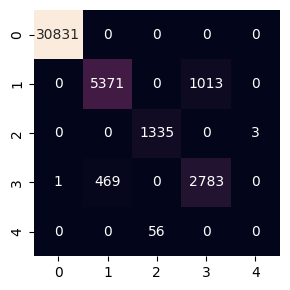

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix

data_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

La matriz de  confusión pra el dataset test nos indica que la cantidad de resultados clasificados correctamente es mayor en relación a los clasificados incorrectamente.
- El modelo clasificó correctamente todos los registros de la clase 0, sin falsos positivos ni falsos negativos.
- En cuanto a la clase 1, 5323 registros fueron clasificados correctamente, mientras que 367 fueron colocados en la clase 2, a pesar de pertenecer a la 1.
- 1336 registros de los 1392 fueron colocados correctamente en la clase 2, los 56 restantes se colocaron erróneamente en la clase 4.
- 2886 registros se colocaron correctamente en la clase 3, mientras que 1061 se clasificaron como clase 1, cuando también pertenecian a la tercera.
- Ningún registro de la clase 4 se registró correctamente. 2 registros de clase fueron colocados en la clase 2 cuando pertenecían a la clase 4.

In [ ]:
## Reporte de clasificación
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30831
           1       0.92      0.84      0.88      6384
           2       0.96      1.00      0.98      1338
           3       0.73      0.86      0.79      3253
           4       0.00      0.00      0.00        56

    accuracy                           0.96     41862
   macro avg       0.72      0.74      0.73     41862
weighted avg       0.96      0.96      0.96     41862



El reporte de clases para el dataset test nos arroja lo siguiente:
- Las clases 0, 1, y 2 tienen precisiones por arriba de 0.94, lo que indica que la mayoría de sus clasificaciones fueron correctas, coincidiendo con los resultados de la matriz de confusion.
- La precisión de la clase 3 es solo del 0.73, lo que es un reesultado aceptable, sin embargo, podría ser mejorado mediante optimización.
- La precisión para la clase 4 es de 0, lo que indica que es necesario realizar un ajuste a los parámetros, ya que ningun registro de esta clase ha sido clasificado correctamente y solo se han obtenido falsos positivos.

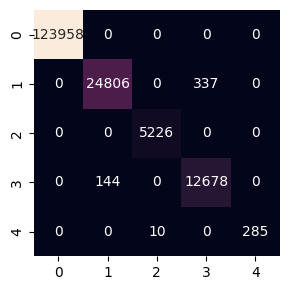

In [ ]:
from sklearn.metrics import confusion_matrix

data_cm = confusion_matrix(y_train, y_predT)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

- La matriz de confusión del dataset train nos indica que tanto la clase 0 como la 4 fueron clasificadas correctamente en todos sus registros. 
- La clase 2 tuvo 5226 registros clasificados correctamente, y 3 fueron colocados en la clase 4, logrando un margen de error muy bajo.
- La clase 1 obtuvo 25052 registros clasificados correctamente, mientras que 38 se colocaron erróneamente en la clase 3.
- La clase 3 fue la que tuvo la mayor cantidad de errores, colocando 91 registros en la clase 1, y 12784 en la clase correcta. 

In [ ]:
## Reporte de clasificación
from sklearn.metrics import  classification_report
print(classification_report(y_train, y_predT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    123958
           1       0.99      0.99      0.99     25143
           2       1.00      1.00      1.00      5226
           3       0.97      0.99      0.98     12822
           4       1.00      0.97      0.98       295

    accuracy                           1.00    167444
   macro avg       0.99      0.99      0.99    167444
weighted avg       1.00      1.00      1.00    167444



Analizando el reporte de clases para el dataset train, podemos observar que la clase 0,1,2 y 4 tienen una precisión del 100%, mientras que la clase 3 solo del 99. Si bien estos resultados son satisfactorios, al comparar con los resultados de test se concluye que es necesario hacer un ajuste de hiperparámetros para aumentar la precisión.

#### Optimización de hiperparámetros 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

param_dist = {
            "max_depth" : [10,50,80,100],
            'min_samples_split' : [30,50,100,120],
            'min_samples_leaf' : [30,50,100,120],
            'max_features': [None, 'sqrt','log2'],
            'n_estimators': [10,50,100,150]
            }

random_search = RandomizedSearchCV(modelRF, random_state=42,param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)

In [ ]:
modelRF = RandomForestClassifier(random_state=42, n_estimators=10, min_samples_split=120, min_samples_leaf=30, max_features=None, max_depth=50)
modelRF.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features=None, min_samples_leaf=30,
                       min_samples_split=120, n_estimators=10, random_state=42)

In [ ]:
y_pred = modelRF.predict(X_test)
accuracy_score(y_test, y_pred)

0.9682528307295399

In [ ]:
y_predT = modelRF.predict(X_train)
accuracy_score(y_train, y_predT)

0.9701452425885669

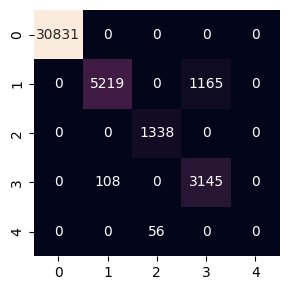

In [ ]:
from sklearn.metrics import confusion_matrix

data_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30831
           1       0.98      0.82      0.89      6384
           2       0.96      1.00      0.98      1338
           3       0.73      0.97      0.83      3253
           4       0.00      0.00      0.00        56

    accuracy                           0.97     41862
   macro avg       0.73      0.76      0.74     41862
weighted avg       0.97      0.97      0.97     41862



/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


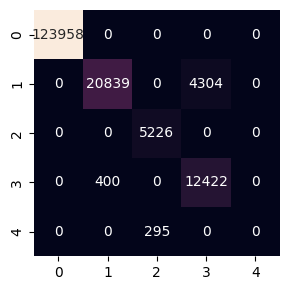

In [ ]:
from sklearn.metrics import confusion_matrix

data_cm = confusion_matrix(y_train, y_predT)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [ ]:
print(classification_report(y_train, y_predT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    123958
           1       0.98      0.83      0.90     25143
           2       0.95      1.00      0.97      5226
           3       0.74      0.97      0.84     12822
           4       0.00      0.00      0.00       295

    accuracy                           0.97    167444
   macro avg       0.73      0.76      0.74    167444
weighted avg       0.97      0.97      0.97    167444



/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 2. XGB

In [ ]:
from xgboost import XGBClassifier

modelXGB = XGBClassifier(random_state = 42)
modelXGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = modelXGB.predict(X_test)
accuracy_score(y_test, y_pred)

0.9670345420667908

In [ ]:
y_predT = modelXGB.predict(X_train)
accuracy_score(y_train, y_predT)

0.9751797615919352

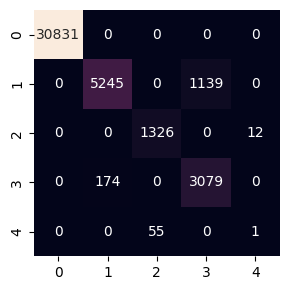

In [ ]:
from sklearn.metrics import confusion_matrix

data_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

La matriz de confusión muestra un excelente desempeño en la predicción de la clase 0 (sin lesión grave), clasificando correctamente 30,831 casos sin errores. Sin embargo, hay confusión entre las clases 1 y 3, donde 1,139 instancias de la clase 1 fueron mal clasificadas como 3 y 174 de la clase 3 como 1, lo que sugiere que el modelo tiene dificultades para diferenciar entre lesiones leves e incapacidades temporales. La clase 2 muestra un buen desempeño con solo 12 errores hacia la clase 4. No obstante, la clase 4 (lesión más severa) tiene un rendimiento muy pobre, con solo una predicción correcta y 55 casos mal clasificados como clase 2, probablemente debido al desbalance de datos. 

In [ ]:
## Reporte de clasificación
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30831
           1       0.97      0.82      0.89      6384
           2       0.96      0.99      0.98      1338
           3       0.73      0.95      0.82      3253
           4       0.08      0.02      0.03        56

    accuracy                           0.97     41862
   macro avg       0.75      0.76      0.74     41862
weighted avg       0.97      0.97      0.97     41862



El modelo XGB muestra un buen rendimiento en la clase 0 (sin lesión grave), con una precisión, recall y f1-score de 1.00, lo que indica que predice esta clase sin errores. Para la clase 1 (lesiones leves), la precisión es de 0.97, pero el recall es 0.82, lo que sugiere que el modelo no detecta correctamente todas las instancias de esta categoría. La clase 2 (lesiones moderadas) tiene un alto recall (0.99) pero menor precisión (0.96), lo que indica que predice muchos casos como clase 2, pero algunos pueden ser falsos positivos. En la clase 3 (lesiones graves), el recall es muy alto (0.95), pero la precisión baja a 0.73, lo que sugiere que muchos casos de otras clases se confunden con esta categoría. La clase 4 (lesiones fatales) tiene un desempeño muy bajo con una precisión de 0.08 y un recall de 0.02, reflejando el desbalance de datos y la dificultad del modelo para identificar correctamente estos casos. El accuracy global es de 0.97, pero el macro promedio de f1-score (0.76) indica que el rendimiento es desigual entre clases.

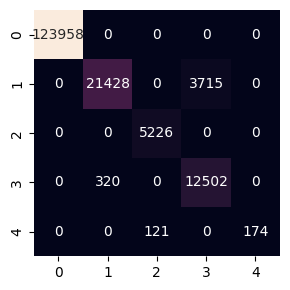

In [ ]:
data_cm = confusion_matrix(y_train, y_predT)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

La matriz de confusión del conjunto de entrenamiento indica que el modelo XGBoost ha aprendido correctamente la mayoría de las clases, ya que la clase 0 (sin lesión grave) tiene una clasificación perfecta con 123,958 instancias correctamente predichas. Sin embargo, en la clase 1 (lesiones leves), hay 3,715 instancias mal clasificadas en otra categoría, lo que indica cierta confusión. En la clase 2 (lesiones moderadas), el modelo predice correctamente 5,226 casos, sin errores significativos. La clase 3 (lesiones graves) muestra 12,502 predicciones correctas, pero con 320 casos mal clasificados. Finalmente, la clase 4 (lesiones fatales) tiene 174 predicciones correctas, pero 121 mal asignadas, lo que evidencia que el modelo aún tiene dificultades en identificar correctamente esta categoría debido al desbalance de datos.

In [ ]:
print(classification_report(y_train, y_predT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    123958
           1       0.99      0.85      0.91     25143
           2       0.98      1.00      0.99      5226
           3       0.77      0.98      0.86     12822
           4       1.00      0.59      0.74       295

    accuracy                           0.98    167444
   macro avg       0.95      0.88      0.90    167444
weighted avg       0.98      0.98      0.98    167444



El modelo XGB tiene un desempeño bueno, con una precisión y recall de 1.00 para la clase 0, lo que indica que clasifica perfectamente los casos sin lesiones graves. Para la clase 1, el modelo logra una alta precisión de 0.99, aunque el recall es de 0.85, lo que sugiere que algunos casos de esta clase están siendo clasificados incorrectamente. La clase 2 presenta un excelente recall de 1.00 y una precisión de 0.98, lo que indica que el modelo captura bien esta categoría. En la clase 3, aunque la precisión es de 0.77, el recall de 0.98 sugiere que el modelo identifica correctamente la mayoría de los casos, pero puede confundirlos con otras clases. La clase 4, siendo la menos representada (295 casos), tiene una precisión perfecta de 1.00, pero un recall de solo 0.59, lo que significa que muchos casos reales de esta categoría no son identificados correctamente. El accuracy general del modelo es de 0.98, lo que indica un excelente desempeño, pero el macro promedio de recall (0.88) sugiere que el modelo aún tiene margen de mejora en la detección de clases minoritarias.

#### Optimización de parámetros

In [ ]:
import xgboost as xgb

# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(1, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'n_estimators':stats.randint(50, 200),
    'gamma': [0, 1],
    'colsample_bytree': [0.5, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, random_state=42,param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)

In [ ]:
model_XGB = XGBClassifier(random_state = 42, colsample_bytree=1, gamma = 1, learning_rate = 0.08080725777960454, max_depth =  6, n_estimators = 102)
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08080725777960454, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=102, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = model_XGB.predict(X_test)
accuracy_score(y_test, y_pred)

0.9683483827815202

In [ ]:
y_predT = model_XGB.predict(X_train)
accuracy_score(y_train, y_predT)

0.9703721841332027

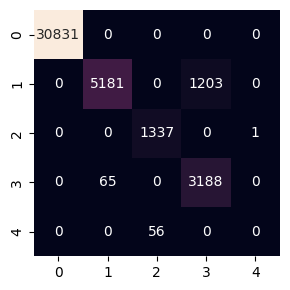

In [ ]:
data_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

 La nueva matriz de confusión muestra que la clase mayoritaria (0) sigue siendo perfectamente clasificada, mientras que en la clase 1 se reduce ligeramente el número de falsos negativos (1203 frente a 1139 en la versión anterior). La clase 2 mantiene un buen desempeño, con una leve mejora en la detección correcta. La clase 3 muestra una reducción en los errores de clasificación con 3188 predicciones correctas. La clase 4 sigue siendo la más difícil de clasificar correctamente, con solo 56 aciertos. 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30831
           1       0.99      0.81      0.89      6384
           2       0.96      1.00      0.98      1338
           3       0.73      0.98      0.83      3253
           4       0.00      0.00      0.00        56

    accuracy                           0.97     41862
   macro avg       0.73      0.76      0.74     41862
weighted avg       0.97      0.97      0.97     41862



El informe de clasificación muestra que el modelo tiene un desempeño con una precisión general del 97%. La clase mayoritaria (0) se clasifica perfectamente con un f1-score de 1.00, lo que indica que el modelo no tiene problemas en identificarla. La clase 1 mantiene una alta precisión (0.99) pero un recall de 0.81, lo que sugiere que algunos ejemplos de esta clase se confunden con otras. La clase 2 tiene un excelente balance con una precisión de 0.96 y un recall de 1.00, mostrando que casi todos sus casos son correctamente identificados. La clase 3 presenta un recall muy alto (0.98), aunque su precisión es menor (0.73), lo que indica que algunas predicciones de esta clase pueden ser erróneas. La clase 4 sigue siendo la más problemática con valores de precisión y recall en 0.00, lo que indica que el modelo no logra capturarla correctamente.

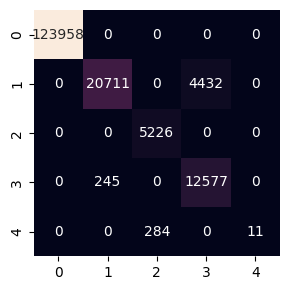

In [ ]:
data_cm = confusion_matrix(y_train, y_predT)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

La matriz de confusión muestra un rendimiento sólido del modelo, especialmente en la clase mayoritaria (0), que se clasifica casi perfectamente. La clase 1 presenta un buen número de aciertos (20,711), pero con 4,432 instancias clasificadas erróneamente en otras clases, lo que indica cierta dificultad en su identificación. La clase 2 se maneja de manera eficiente con 5,226 instancias correctamente clasificadas y pocas confusiones. La clase 3 también tiene un desempeño fuerte con 12,577 aciertos, aunque se observan 245 casos mal clasificados. La clase 4 sigue mostrando problemas, con solo 11 instancias correctamente identificadas y 284 clasificadas erróneamente, lo que sugiere que esta clase sigue siendo difícil de predecir. 

In [ ]:
print(classification_report(y_train, y_predT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    123958
           1       0.99      0.82      0.90     25143
           2       0.95      1.00      0.97      5226
           3       0.74      0.98      0.84     12822
           4       1.00      0.04      0.07       295

    accuracy                           0.97    167444
   macro avg       0.94      0.77      0.76    167444
weighted avg       0.98      0.97      0.97    167444



El reporte de clasificación muestra un alto desempeño del modelo con una precisión global del 97%. La clase mayoritaria (0) se clasifica perfectamente con una precisión y recall de 1.00. La clase 1 también muestra una excelente precisión (0.99) pero con un recall más bajo (0.82), lo que indica que algunas instancias de esta clase son clasificadas erróneamente. La clase 2 tiene una precisión de 0.95 y un recall de 1.00, lo que significa que todos los ejemplos de esta clase fueron correctamente identificados, aunque con algunas confusiones menores. La clase 3 presenta una precisión de 0.74 y un recall de 0.98, lo que sugiere que, aunque el modelo identifica la mayoría de los casos, también clasifica erróneamente algunas instancias. La clase 4 sigue siendo problemática con un recall extremadamente bajo (0.04) a pesar de una precisión perfecta (1.00), lo que indica que casi todas las instancias de esta clase fueron clasificadas incorrectamente en otras categorías.

In [ ]:
from xgboost import XGBClassifier

# Calcular el ratio de desbalance
class_counts = y_train.value_counts()
scale_pos_weight = class_counts[0] / class_counts[1:]  # Ajusta según el desequilibrio

# Modelo con ajuste de peso
model_XGB = XGBClassifier(random_state=42, colsample_bytree=1, gamma=1, 
                          learning_rate=0.08, max_depth=6, n_estimators=102, 
                          scale_pos_weight=scale_pos_weight.mean())

model_XGB.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [02:48:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=102,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
model_XGB = XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', 
                          gamma=1, learning_rate=0.08, max_depth=6, 
                          n_estimators=102, scale_pos_weight=scale_pos_weight.mean())

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

weights = compute_sample_weight(class_weight='balanced', y=y_train)
model_XGB.fit(X_train, y_train, sample_weight=weights)


/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [02:51:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=102,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 150],
    'scale_pos_weight': [scale_pos_weight.mean()]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, scoring='f1_weighted', cv=5)
grid_search.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [02:51:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [02:51:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [02:51:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [02:51:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [02:51:44] WARNING: /workspace/src/le

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [4, 6, 8],
                         'n_estimators': [100, 150],
                         'scale_pos_weight': [np.float64(114.62845299206833)]},
             scoring='f1_weighted')

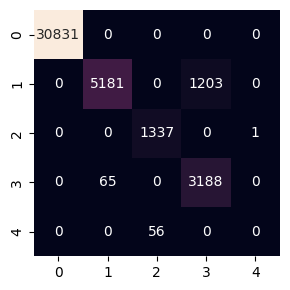

In [ ]:
# Matriz de confusión
data_cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30831
           1       0.99      0.81      0.89      6384
           2       0.96      1.00      0.98      1338
           3       0.73      0.98      0.83      3253
           4       0.00      0.00      0.00        56

    accuracy                           0.97     41862
   macro avg       0.73      0.76      0.74     41862
weighted avg       0.97      0.97      0.97     41862



In [ ]:
print(classification_report(y_train, y_predT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    123958
           1       0.99      0.82      0.90     25143
           2       0.95      1.00      0.97      5226
           3       0.74      0.98      0.84     12822
           4       1.00      0.04      0.07       295

    accuracy                           0.97    167444
   macro avg       0.94      0.77      0.76    167444
weighted avg       0.98      0.97      0.97    167444



### 3. Naive-Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

modelNB = GaussianNB()
modelNB.fit(X_train, y_train)

In [ ]:
y_pred = modelNB.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
y_predT = modelNB.predict(X_train)
accuracy_score(y_train, y_predT)

In [ ]:
accuracy_score(y_train, y_predT)

In [ ]:
from sklearn.metrics import confusion_matrix

data_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [ ]:
## Reporte de clasificación
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

In [ ]:
data_cm = confusion_matrix(y_train, y_predT)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

#### Optimización de hiperparámetros

In [ ]:
import numpy as np
hyperparams = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
random_search = RandomizedSearchCV(modelNB, hyperparams, n_iter = 50, scoring = "accuracy", cv = 5, random_state = 42)
random_search.fit(X_train, y_train)
random_search.best_params_


In [ ]:
modelNB = GaussianNB(var_smoothing=np.float64(5.336699231206302e-08))
modelNB.fit(X_train, y_train)

In [ ]:
y_pred = modelNB.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
y_predT = modelNB.predict(X_train)
accuracy_score(y_train, y_predT)

In [ ]:
from sklearn.metrics import confusion_matrix

data_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
data_cm = confusion_matrix(y_train, y_predT)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [ ]:
print(classification_report(y_train, y_predT))

### 4. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

In [ ]:
y_pred = modelKNN.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
y_predT = modelKNN.predict(X_train)
accuracy_score(y_train, y_predT)

In [ ]:
from sklearn.metrics import confusion_matrix

data_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [ ]:
## Reporte de clasificación
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print(f"Raíz del Error cuadrático medio: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

In [ ]:
lista_rmse_train = []
lista_rmse_test = []

#Valores de vecinos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]


for k in k_vecinos:

    model_hiper = KNeighborsClassifier(n_neighbors=k)
    model_hiper.fit(X_train,y_train)

    y_train_pred = model_hiper.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    y_test_pred = model_hiper.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.suptitle('RMSE para optimización  de vecinos' , fontweight = 'black', fontsize=20)
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel('Número de Vecinos',fontsize=20,fontweight = 'black')
plt.ylabel('RMSE',fontsize=20,fontweight = 'black');

Conclusion sobre los modelos: 

In [ ]:
from pickle import dump

dump(model_XGB, open("model_classifier.sav", "wb"))

Carga de datos de SQLite para modelo KNN (K-Nearest Neighbors)

In [1]:
import sqlite3
import pandas as pd

# Conectar a la base de datos
db_path = "../data/project_db.db"
conn = sqlite3.connect(db_path)

# Leer los datos de la tabla 'accident' en un DataFrame de Pandas
df = pd.read_sql("SELECT * FROM accident;", conn)

# Cerrar la conexión
conn.close()

# Mostrar las primeras filas del DataFrame
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Siendo que 'most_severe_injury' es la variable objetivo
X = df.drop(columns=['most_severe_injury'])  # Variables de entrada
y = df['most_severe_injury']  # Variable objetivo

# Convertir variables categóricas a números si es necesario
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Escalar los datos (recomendado para KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
#Entrenar el modelo KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)  # Ajuste de el número de vecinos (k)
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Precisión del modelo KNN: {accuracy:.2f}")

🎯 Precisión del modelo KNN: 1.00


Modelo Naïve Bayes

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['most_severe_injury'])  # Variables de entrada
y = df['most_severe_injury']  # Variable objetivo

# Convertir variables categóricas a números si es necesario
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Entrenando el modelo Naïve Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo
nb = GaussianNB()
nb.fit(X_train, y_train)

# Hacer predicciones
y_pred = nb.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Precisión del modelo Naïve Bayes: {accuracy:.2f}")

🎯 Precisión del modelo Naïve Bayes: 0.77
